In [2]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/Users/raisariabinina/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/raisariabinina/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [3]:
from sklearn.datasets import load_iris

In [36]:
data = load_iris()

In [37]:
X, y = data['data'], data['target']

In [38]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [13]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
%%time
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (2.11%)
CPU times: user 35.2 s, sys: 6.12 s, total: 41.3 s
Wall time: 26.7 s


## Решение

In [51]:
%%time
res = []
for i in range(1,10):
    def baseline_model():
        model = Sequential()
        model.add(Dense(i, input_dim=4, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    res.append(cross_val_score(estimator, X, dummy_y, cv=kfold))

CPU times: user 13min 52s, sys: 1min 5s, total: 14min 57s
Wall time: 12min 58s


## График к 3 заданию

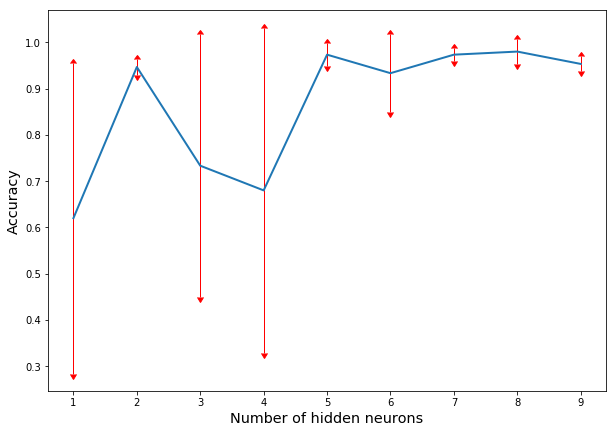

In [56]:
import matplotlib.pyplot as plt
x = range(1,10)
y =  [x.mean() for x in res]
std = [x.std() for x in res]
plt.figure(figsize = (10,7))
plt.plot(x, y, linewidth=2)
plt.errorbar(x,y, std, fmt='none', color="red", elinewidth=1, uplims=True, lolims=True)
plt.xlabel("Number of hidden neurons", {"fontsize":"x-large"})
plt.ylabel("Accuracy", {"fontsize":"x-large"})
plt.savefig(fname="IrisClassifCvScore",format="png")